# Maternal Health Risk

Data Source: https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
from sklearn import set_config
from sklearn.model_selection import train_test_split
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12.0, 9.0]
plt.rcParams['font.size'] = 12
set_config(display='diagram')                       # HTML representation of Pipeline (display diagram)
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
file = os.path.join(path, 'datasets', 'Maternal Health Risk Data Set.csv')
df = pd.read_csv(file)

# Head and Tail

In [4]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [5]:
df.shape                                        

(1014, 7)

In [6]:
pd.value_counts(df.drop(columns='RiskLevel').dtypes)

int64      4
float64    2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


# Exploratory Data Analysis

Barplot and Pie Chart Helper Functions

In [8]:
def plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None):

    # create figure and axis
    fig, ax = plt.subplots()
    
    # plot bar charts
    sns.barplot(x=x, y=y, hue=hue, data=data, ci=ci, ax=ax)

    # label plot
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    return plot_bar


def plot_pie(df, x, height, shadow=None, startangle=None, title=None):

    # initiate matplot figure
    fig, ax = plt.subplots()

    # plot pie
    ax.pie(x=height, labels=x, autopct='%1.1f%%', shadow=shadow, startangle=startangle, data=df)

    # label plot
    ax.set(title=title) 

    return plot_pie

Age Categories ==> 
Children:  less than 15 years
Youth:     15-24 years,
Adults:    25-65 years,
Seniors:   > 65 years

In [9]:
df['AgeCat'] = pd.cut(df['Age'], [0, 15, 25, 65, np.inf], labels=['Children', 'Youth', 'Adults', 'Seniors'])
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat
0,25,130,80,15.0,98.0,86,high risk,Youth
1,35,140,90,13.0,98.0,70,high risk,Adults
2,29,90,70,8.0,100.0,80,high risk,Adults
3,30,140,85,7.0,98.0,70,high risk,Adults
4,35,120,60,6.1,98.0,76,low risk,Adults


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

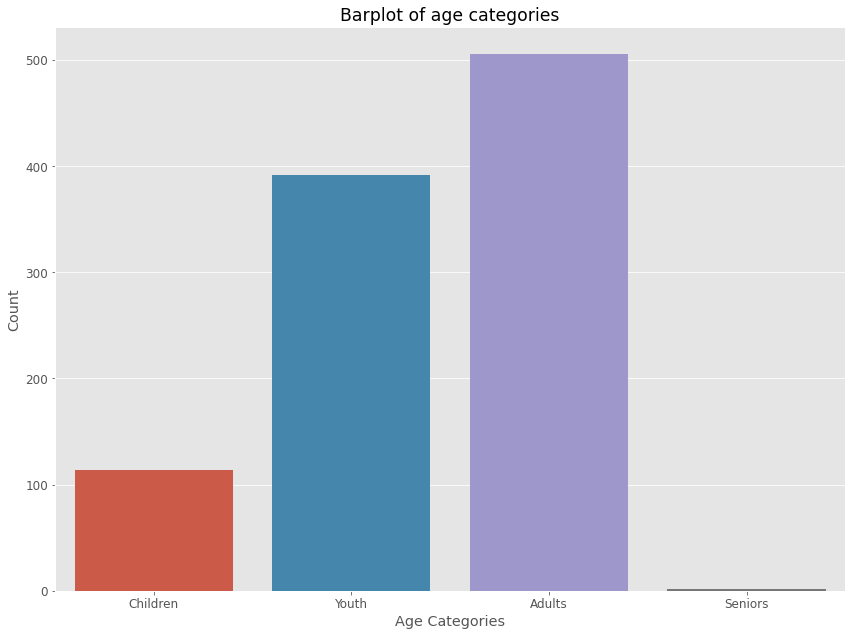

In [10]:
plot_bar(
    x=df['AgeCat'].value_counts().keys(), y=df['AgeCat'].value_counts().values, data=df,
    xlabel='Age Categories', ylabel='Count', title='Barplot of age categories',
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

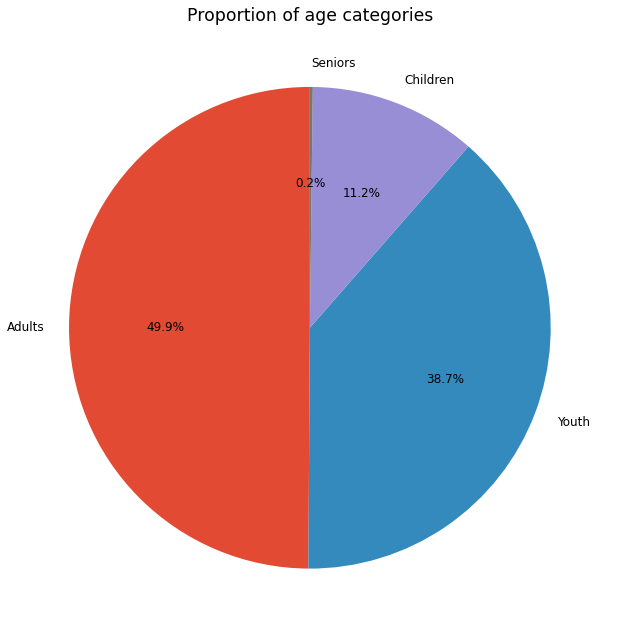

In [11]:
plot_pie(
    df=df, 
    x=df['AgeCat'].value_counts().keys(), height=df['AgeCat'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of age categories'
)

SystolicBP Categories ==> 
systolic: less than 120 mm Hg,
systolic: 120–129 mm Hg,
systolic: 130 mm Hg or higher

In [12]:
syst_cond = [
    (df['SystolicBP'] < 120),
    (df['SystolicBP'] >= 120) & (df['SystolicBP'] < 130),
    (df['SystolicBP'] >= 130)
]

syst_values = ['less than 120 mm Hg', '120–129 mm Hg', '130 mm Hg or higher'] 


df['SystolicBPCat'] = np.select(condlist=syst_cond, choicelist=syst_values)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat,SystolicBPCat
0,25,130,80,15.0,98.0,86,high risk,Youth,130 mm Hg or higher
1,35,140,90,13.0,98.0,70,high risk,Adults,130 mm Hg or higher
2,29,90,70,8.0,100.0,80,high risk,Adults,less than 120 mm Hg
3,30,140,85,7.0,98.0,70,high risk,Adults,130 mm Hg or higher
4,35,120,60,6.1,98.0,76,low risk,Adults,120–129 mm Hg


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

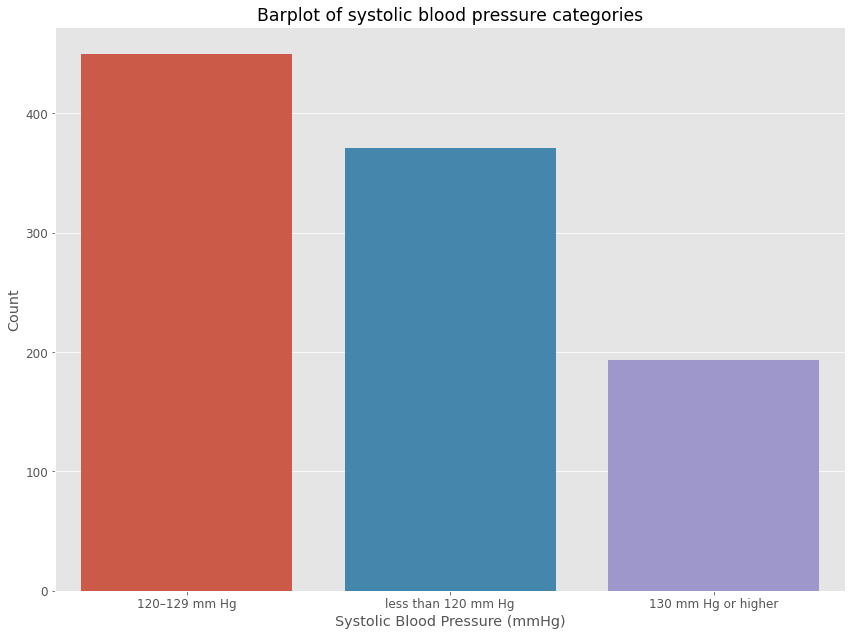

In [13]:
plot_bar(
    x=df['SystolicBPCat'].value_counts().keys(), y=df['SystolicBPCat'].value_counts().values, data=df,
    xlabel='Systolic Blood Pressure (mmHg)', ylabel='Count', title='Barplot of systolic blood pressure categories',
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

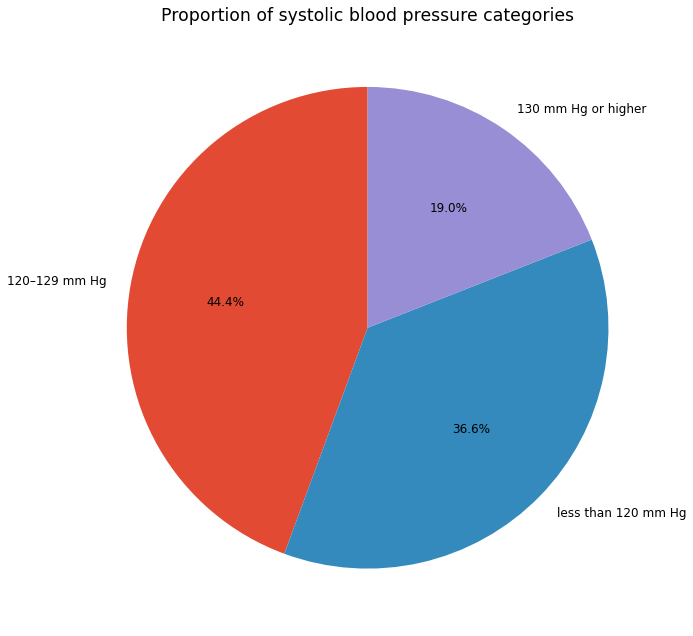

In [14]:
plot_pie(
    df=df, 
    x=df['SystolicBPCat'].value_counts().keys(), height=df['SystolicBPCat'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of systolic blood pressure categories'
)

DiastolicBP Categories ==> 
diastolic: less than 80 mm Hg,
diastolic: 80 mm Hg or higher

In [15]:
diast_cond = [
    (df['DiastolicBP'] < 80),
    (df['DiastolicBP'] >= 80)
]

diast_values = ['less than 80 mm Hg', '80 mm Hg or higher'] 


df['DiastolicBPCat'] = np.select(condlist=diast_cond, choicelist=diast_values)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat,SystolicBPCat,DiastolicBPCat
0,25,130,80,15.0,98.0,86,high risk,Youth,130 mm Hg or higher,80 mm Hg or higher
1,35,140,90,13.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher
2,29,90,70,8.0,100.0,80,high risk,Adults,less than 120 mm Hg,less than 80 mm Hg
3,30,140,85,7.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher
4,35,120,60,6.1,98.0,76,low risk,Adults,120–129 mm Hg,less than 80 mm Hg


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

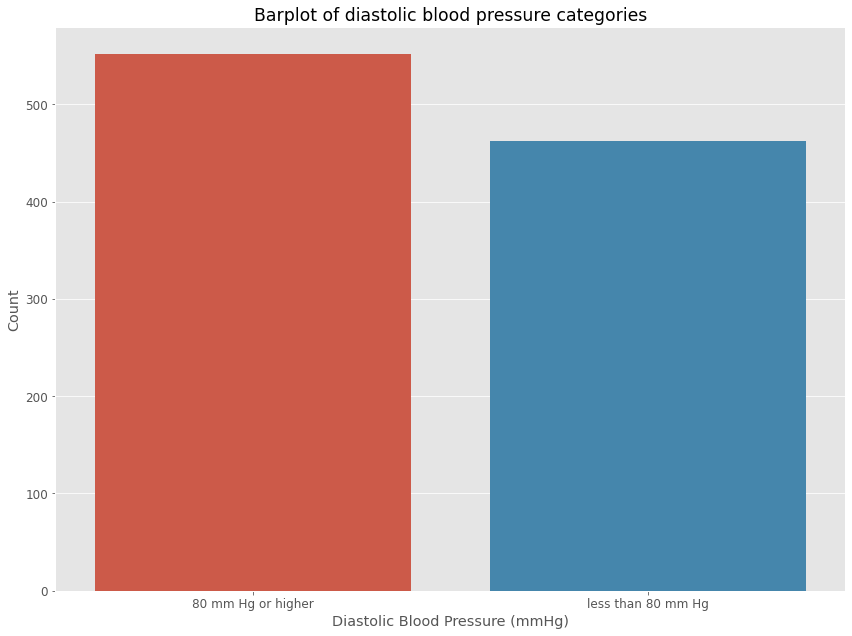

In [16]:
plot_bar(
    x=df['DiastolicBPCat'].value_counts().keys(), y=df['DiastolicBPCat'].value_counts().values, data=df,
    xlabel='Diastolic Blood Pressure (mmHg)', ylabel='Count', title='Barplot of diastolic blood pressure categories',
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

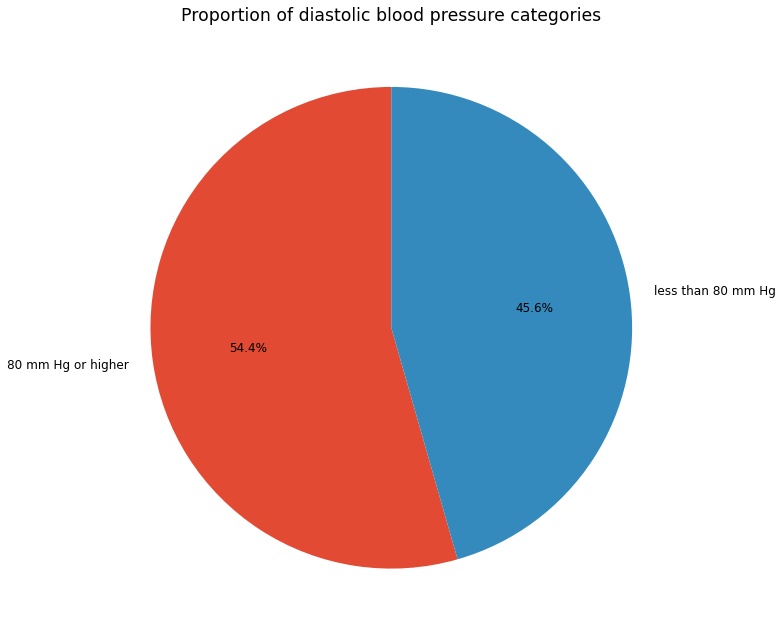

In [17]:
plot_pie(
    df=df, 
    x=df['DiastolicBPCat'].value_counts().keys(), height=df['DiastolicBPCat'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of diastolic blood pressure categories'
)

BS Categories ==> 
Normal: less than 5.7 mmol/L,
Prediabetes: 5.7–6.4 mmol/L,
Diabetes: 6.5 or higher mmol/L

In [18]:
def bs_cat(x):
    if x < 5.7:
        return 'Normal'
    elif (x >= 5.7) & (x < 6.5):
        return 'Prediabetes'
    else:
        return 'Diabetes'

df['BSCat'] = df['BS'].apply(bs_cat)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat,SystolicBPCat,DiastolicBPCat,BSCat
0,25,130,80,15.0,98.0,86,high risk,Youth,130 mm Hg or higher,80 mm Hg or higher,Diabetes
1,35,140,90,13.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes
2,29,90,70,8.0,100.0,80,high risk,Adults,less than 120 mm Hg,less than 80 mm Hg,Diabetes
3,30,140,85,7.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes
4,35,120,60,6.1,98.0,76,low risk,Adults,120–129 mm Hg,less than 80 mm Hg,Prediabetes


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

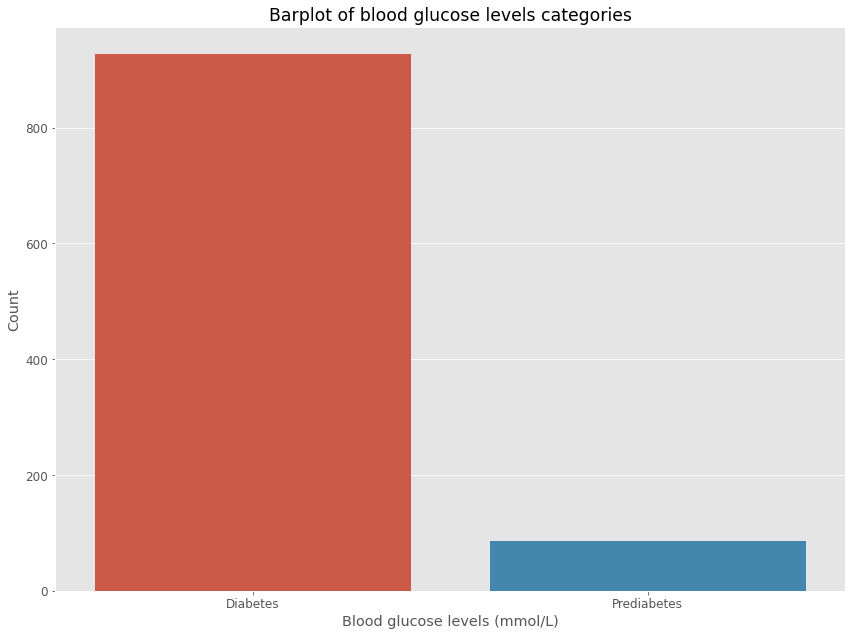

In [19]:
plot_bar(
    x=df['BSCat'].value_counts().keys(), y=df['BSCat'].value_counts().values, data=df,
    xlabel='Blood glucose levels (mmol/L)', ylabel='Count', title='Barplot of blood glucose levels categories', 
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

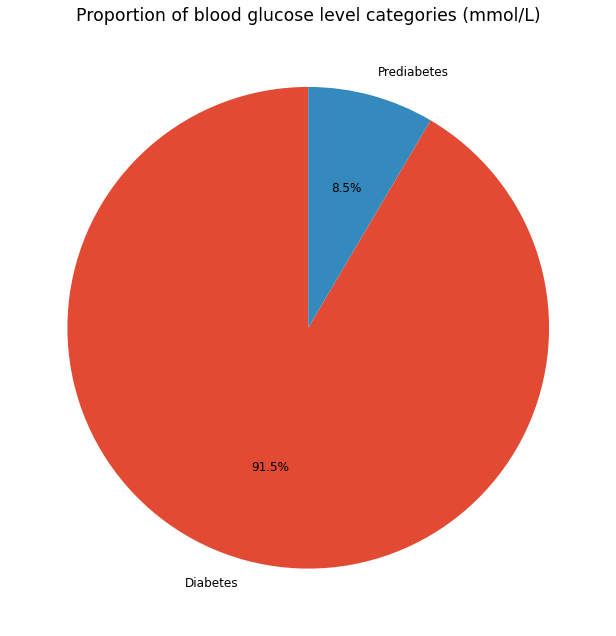

In [20]:
plot_pie(
    df=df, 
    x=df['BSCat'].value_counts().keys(), height=df['BSCat'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of blood glucose level categories (mmol/L)'
)

BodyTemp Categories ==> 
Hypothermia: < 35.0 °C (95.0 °F),
Normal: 36.5–37.5 °C (97.7–99.5 °F),
Hyperthermia: > 37.5 or 38.3 °C (99.5 or 100.9 °F),
Hyperpyrexia: > 40.0 or 41.0 °C (104.0 or 105.8 °F)

In [21]:
def temp_cat(x):
    if x < 95:
        return 'Hypothermia'
    elif (x >= 97.7) & (x < 99.5):
        return 'Normal'
    elif (x >= 99.5) & (x < 100.9):
        return 'Hyperthermia'
    else:
        return 'Hyperpyrexia'
        
        
df['BodyTempCat'] = df['BodyTemp'].apply(temp_cat)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat,SystolicBPCat,DiastolicBPCat,BSCat,BodyTempCat
0,25,130,80,15.0,98.0,86,high risk,Youth,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal
1,35,140,90,13.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal
2,29,90,70,8.0,100.0,80,high risk,Adults,less than 120 mm Hg,less than 80 mm Hg,Diabetes,Hyperthermia
3,30,140,85,7.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal
4,35,120,60,6.1,98.0,76,low risk,Adults,120–129 mm Hg,less than 80 mm Hg,Prediabetes,Normal


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

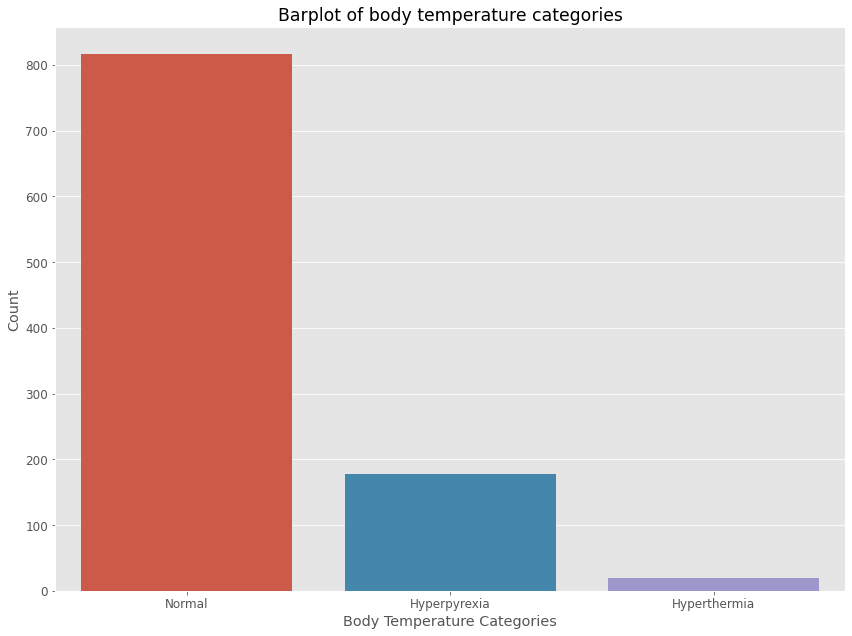

In [22]:
plot_bar(
    x=df['BodyTempCat'].value_counts().keys(), y=df['BodyTempCat'].value_counts().values, data=df,
    xlabel='Body Temperature Categories', ylabel='Count', title='Barplot of body temperature categories', 
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

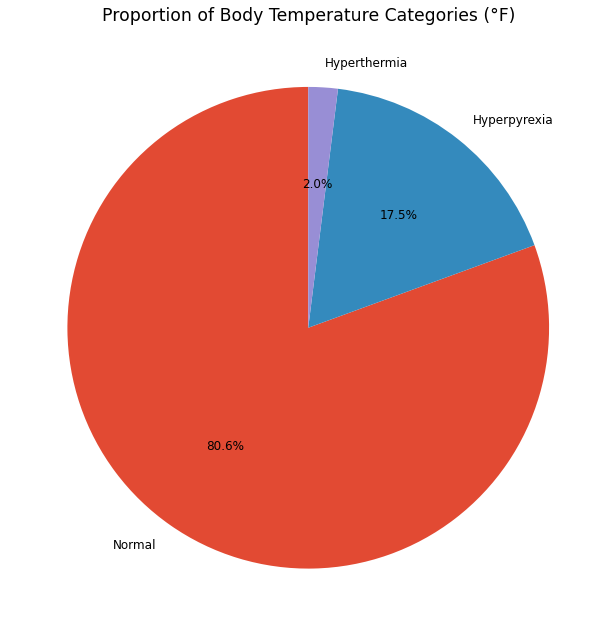

In [23]:
plot_pie(
    df=df, 
    x=df['BodyTempCat'].value_counts().keys(), height=df['BodyTempCat'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of Body Temperature Categories (°F)'
)

HeartRate Categories ==> 
Slow: less than 60 beats per minute,
Normal: between 60-100 beats per minute,
Fast: greater than 100 beats per minute

In [24]:
def hrt_rate_cat(x):
    if x < 60:
        return 'Slow'
    elif (x > 60) & (x < 100):
        return 'Normal'
    else:
        return 'Fast'

df['HeartRateCat'] = df['HeartRate'].apply(hrt_rate_cat)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat,SystolicBPCat,DiastolicBPCat,BSCat,BodyTempCat,HeartRateCat
0,25,130,80,15.0,98.0,86,high risk,Youth,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal,Normal
1,35,140,90,13.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal,Normal
2,29,90,70,8.0,100.0,80,high risk,Adults,less than 120 mm Hg,less than 80 mm Hg,Diabetes,Hyperthermia,Normal
3,30,140,85,7.0,98.0,70,high risk,Adults,130 mm Hg or higher,80 mm Hg or higher,Diabetes,Normal,Normal
4,35,120,60,6.1,98.0,76,low risk,Adults,120–129 mm Hg,less than 80 mm Hg,Prediabetes,Normal,Normal


<function __main__.plot_bar(data, x, y, hue=None, ci=None, ax=None, xlabel=None, ylabel=None, title=None)>

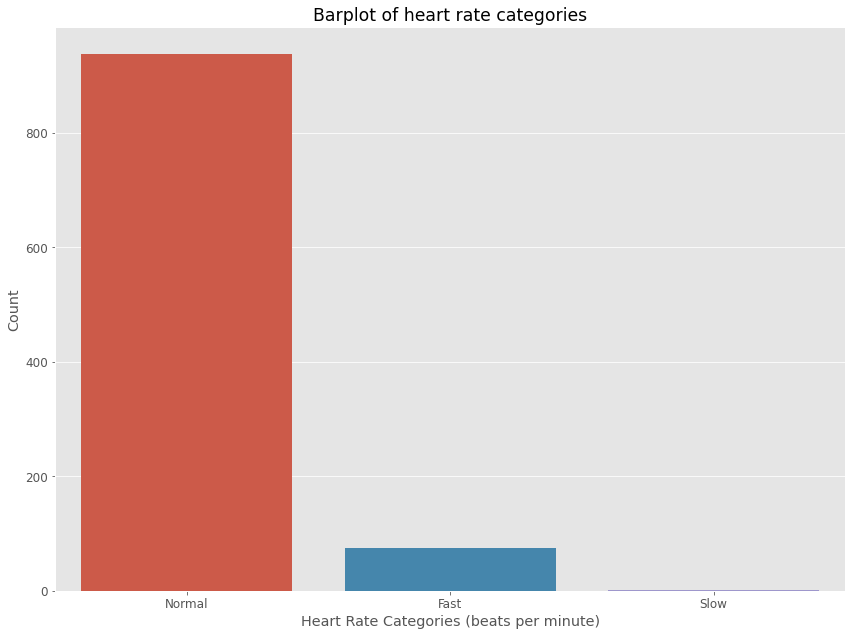

In [25]:
plot_bar(
    x=df['HeartRateCat'].value_counts().keys(), y=df['HeartRateCat'].value_counts().values, data=df,
    xlabel='Heart Rate Categories (beats per minute)', ylabel='Count', title='Barplot of heart rate categories', 
)

<function __main__.plot_pie(df, x, height, shadow=None, startangle=None, title=None)>

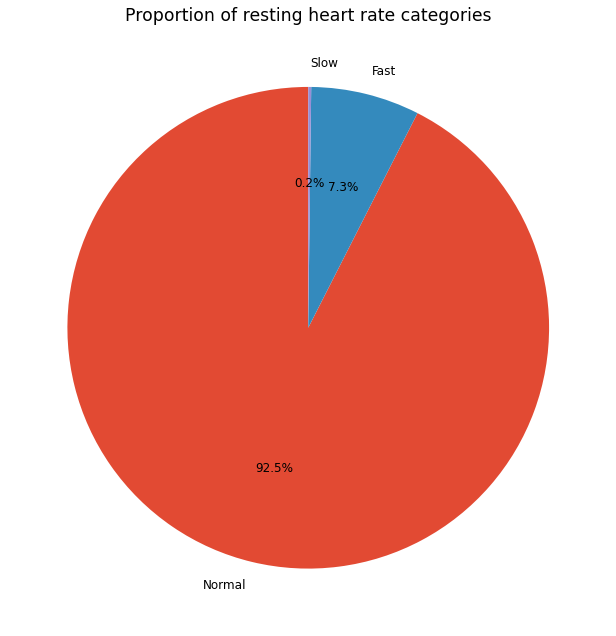

In [26]:
plot_pie(
    df=df, 
    x=df['HeartRateCat'].value_counts().keys(), height=df['HeartRateCat'].value_counts(normalize=True).values, startangle=90,
    title='Proportion of resting heart rate categories'
)

# Correlation Matrix

In [27]:
corr_matrix = df.corr()                     # generate the correlation matrix
corr_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


In [28]:
corr_matrix.shape

(6, 6)

plot heatmap - absolute value(0-0.3; weak/no relationship, 0.3-0.7; moderate, > 0.7 strong correlation)

<AxesSubplot:>

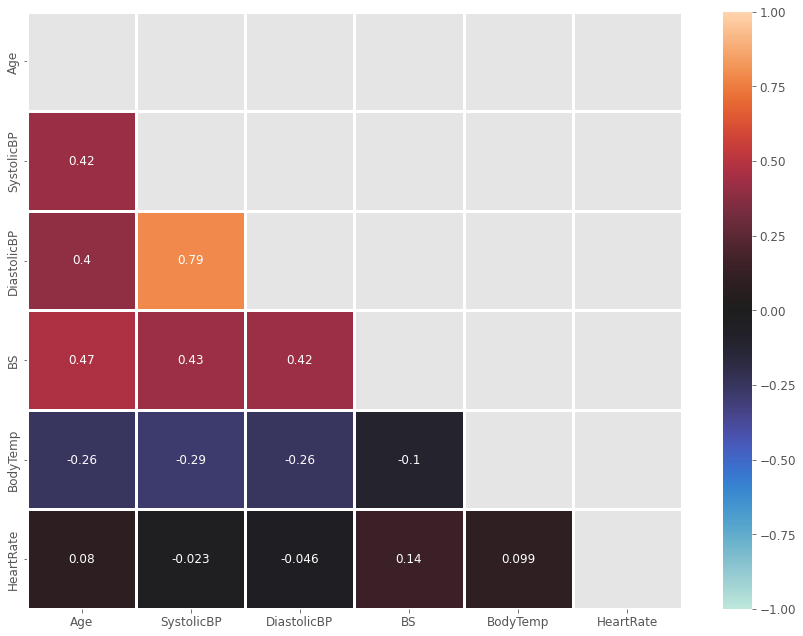

In [29]:
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, center=0, annot=True, linewidths=3)

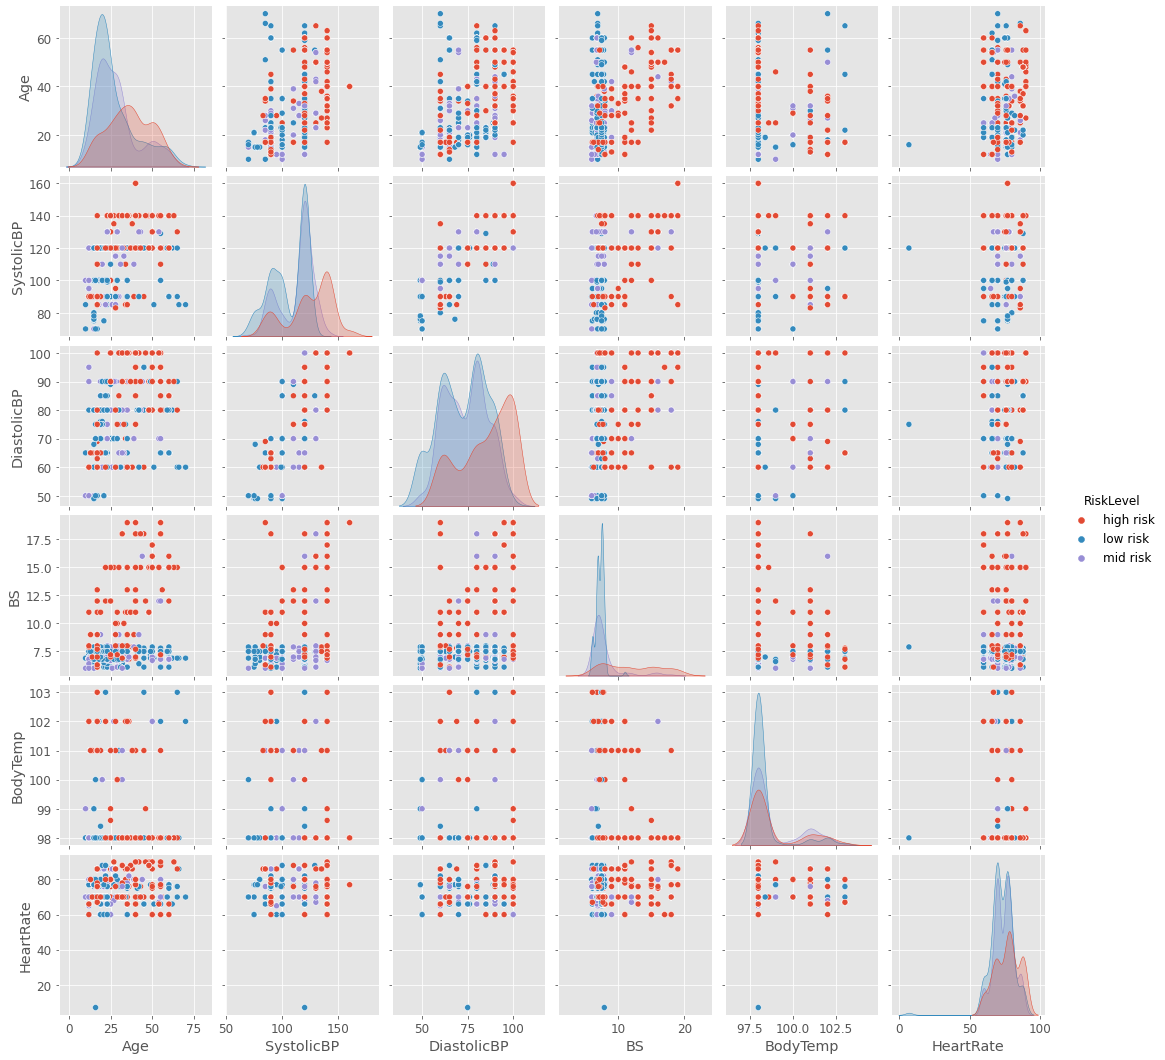

In [30]:
sns.pairplot(data=df, hue='RiskLevel')

In [31]:
# joint plot helper function
def joint_plot(data, x, y, color=None, hue=None):
    '''return the relationship between two variables'''
    return sns.jointplot(data=data, x=x, y=y, kind='scatter', color=color, hue=hue)

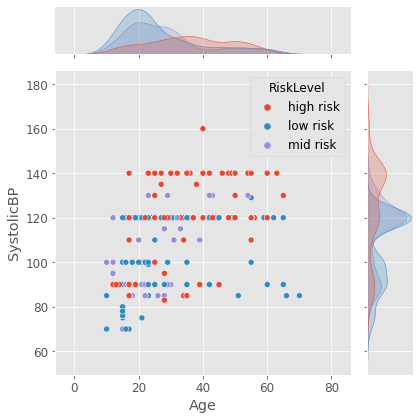

In [32]:
joint_plot(
    data=df,
    x='Age', y='SystolicBP',
    hue='RiskLevel')

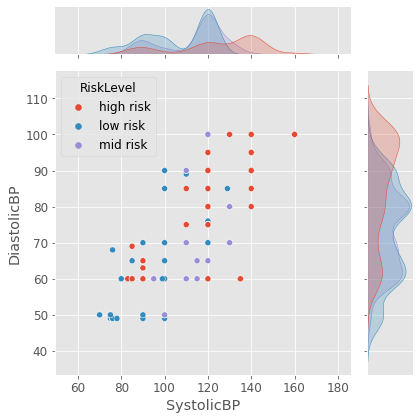

In [33]:
joint_plot(
    data=df,
    x='SystolicBP', y='DiastolicBP',
    hue='RiskLevel')

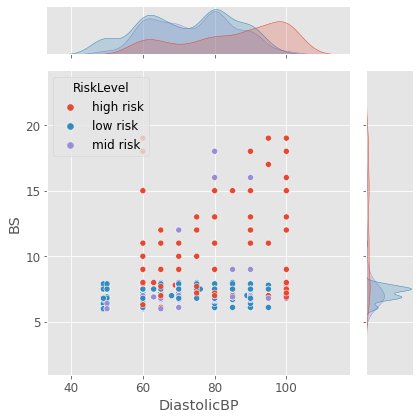

In [34]:
joint_plot(
    data=df,
    x='DiastolicBP', y='BS',
    hue='RiskLevel')

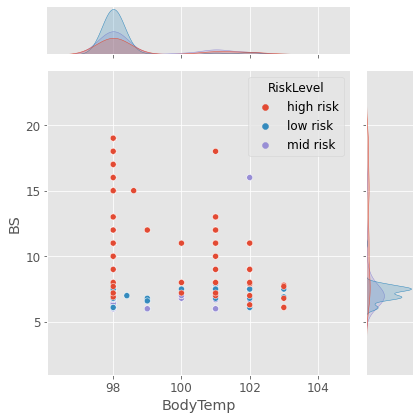

In [35]:
joint_plot(
    data=df,
    x='BodyTemp', y='BS',
    hue='RiskLevel')

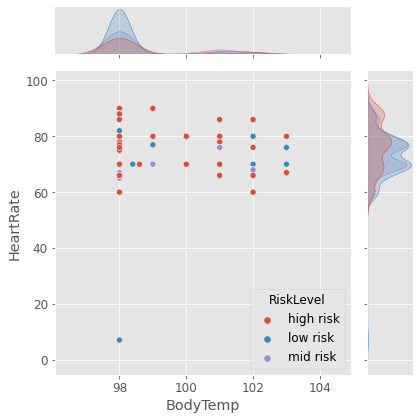

In [36]:
joint_plot(
    data=df,
    x='BodyTemp', y='HeartRate',
    hue='RiskLevel')

# Missing Values Exploration

In [37]:
df.isna().sum()

Age               0
SystolicBP        0
DiastolicBP       0
BS                0
BodyTemp          0
HeartRate         0
RiskLevel         0
AgeCat            0
SystolicBPCat     0
DiastolicBPCat    0
BSCat             0
BodyTempCat       0
HeartRateCat      0
dtype: int64

# Data Splitting

In [38]:
# set random seed
rnd_state = 42

# select feature columns
feature_cols = df.drop(columns=['RiskLevel']).columns

# select target column
target_col = 'RiskLevel'

X, y = df[feature_cols], df[target_col]

<AxesSubplot:>

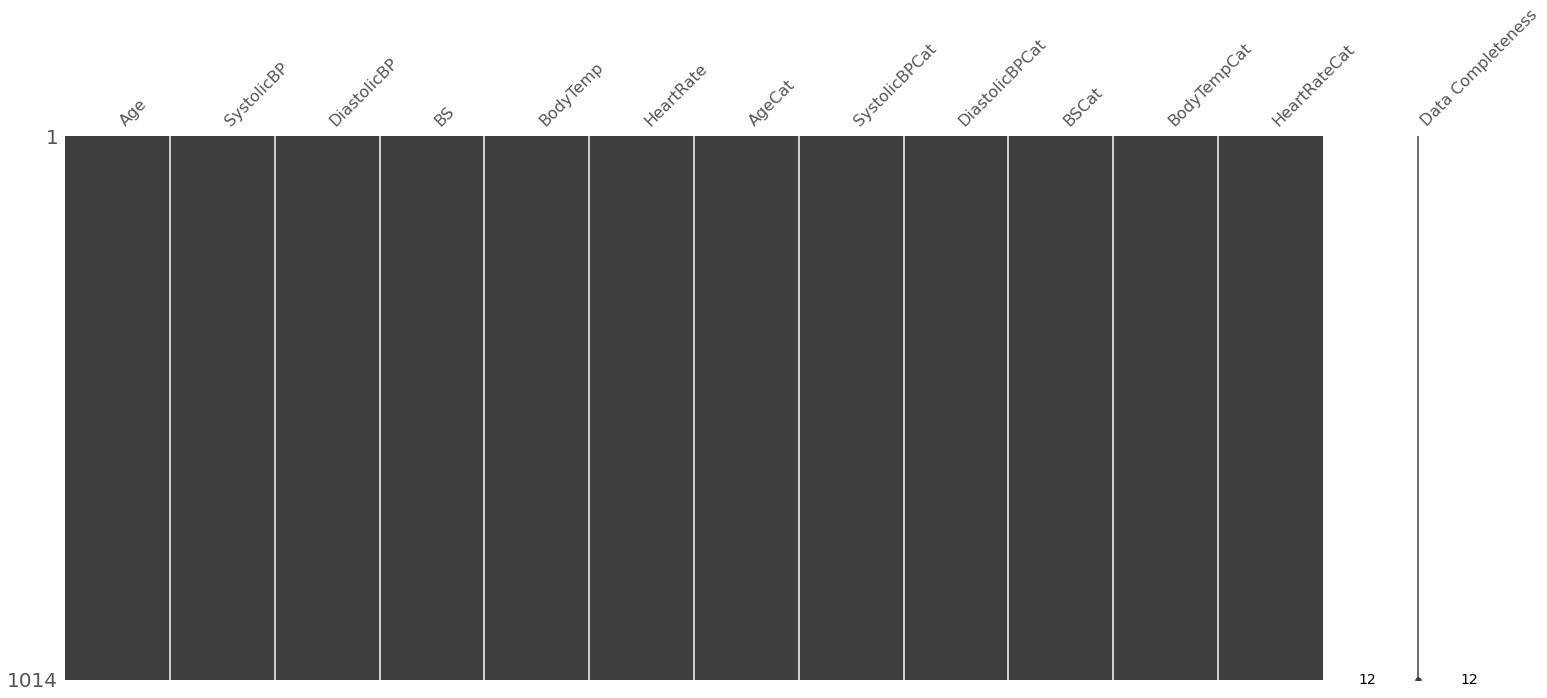

In [39]:
# missing value exploration in feature dataframe
msno.matrix(X, labels=True, sort='descending')                                  # no missing values evident

In [40]:
# generate descriptive statistics
X.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SystolicBP'}>],
       [<AxesSubplot:title={'center':'DiastolicBP'}>,
        <AxesSubplot:title={'center':'BS'}>],
       [<AxesSubplot:title={'center':'BodyTemp'}>,
        <AxesSubplot:title={'center':'HeartRate'}>]], dtype=object)

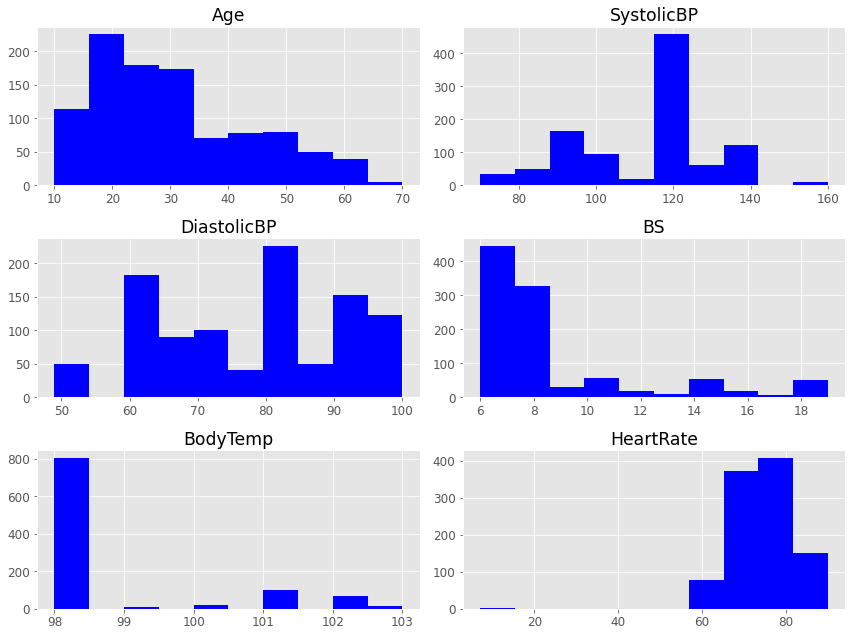

In [41]:
# histogram distribution of feature columns
X.hist(color='blue')

In [42]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rnd_state)

In [43]:
print('Features dimension: {0}; Target dimension: {1}'.format(X.shape, y.shape))
print('X train dimension: {0}; y dimension: {1}'.format(X_train.shape, y_train.shape))
print('X test dimension: {0}; y test dimension: {1}'.format(X_test.shape, y_test.shape))

Features dimension: (1014, 12); Target dimension: (1014,)
X train dimension: (811, 12); y dimension: (811,)
X test dimension: (203, 12); y test dimension: (203,)


# Pipeline

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer, OrdinalEncoder
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
# select numeric and non-numeric columns
num_cols = X.select_dtypes(include=np.number).columns
non_num = X.select_dtypes(exclude=np.number).columns

# create transformers for numeric and non-numeric columns
num_trans = Pipeline(
    steps=[
        ('qt', QuantileTransformer(random_state=rnd_state))  
    ]
)

non_num_trans = Pipeline(
    steps=[
        ('ordenc', OrdinalEncoder())
    ]
)

# apply transformer to numeric and non-numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', num_trans, num_cols),
        ('non_numeric', non_num_trans, non_num)
    ]
)

# Linear Support Vector Classifier

In [46]:
# Append classifier to preprocessing pipeline to have a full prediction pipeline.
lsvc_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('lsvc', LinearSVC(random_state=rnd_state))
    ]
)

lsvc_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer(random_state=42))]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', 'BodyTempCat',
       'HeartRateCat'],
      dtype='object'))])),
                ('lsvc', LinearSVC(random_state=42))])

In [47]:
print("Coefficient: {0} \n\n Intercept: {1}".format(lsvc_pipe.named_steps['lsvc'].coef_, lsvc_pipe.named_steps['lsvc'].intercept_))

Coefficient: [[-0.03924934  1.18195211  1.07885828  1.58170664  0.42293605  0.39932386
  -0.0669449   0.36630468  0.08027534  0.56757218 -0.11479854 -0.15456042]
 [-0.28660792 -2.26878855  0.14705004 -0.38185986  0.16420357 -0.48474308
   0.02830664 -0.29135934 -0.08699623  0.07126299  0.51547626  0.34293323]
 [ 0.32686506  0.70224212 -0.79010305 -0.99246905 -0.53458253  0.0585733
   0.0364385  -0.11956081  0.07902985 -0.54065197 -0.42429182 -0.18682277]] 

 Intercept: [-2.72554784  0.47718398  1.02758874]


In [48]:
# helper function to display model test score
def display_test_score(classifier):
    return 'Model test score: {:.2%}'.format(classifier.score(X_test, y_test))

Linear SVC Test Score

In [49]:
display_test_score(lsvc_pipe)

'Model test score: 61.08%'

# KNeighbors Classifier

In [50]:
# Append classifier to preprocessing pipeline to have a full prediction pipeline.
knn_clf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor), ('KnnC', KNeighborsClassifier())
])

knn_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer(random_state=42))]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', 'BodyTempCat',
       'HeartRateCat'],
      dtype='object'))])),
                ('KnnC', KNeighborsClassifier())])

KNN Model Score

In [51]:
display_test_score(knn_clf_pipe)

'Model test score: 70.44%'

# Support Vector Classifier

In [52]:
# Append classifier to preprocessing pipeline to have a full prediction pipeline.
svc_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor), ('svc', SVC(random_state=rnd_state))
])

svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer(random_state=42))]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', 'BodyTempCat',
       'HeartRateCat'],
      dtype='object'))])),
                ('svc', SVC(random_state=42))])

SVC Test Score 

In [53]:
display_test_score(svc_pipe)

'Model test score: 64.04%'

# Random Forest Classifier

In [54]:
# Append classifier to preprocessing pipeline to have a full prediction pipeline.
rfc_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor), ('rfc', RandomForestClassifier(random_state=rnd_state))
])

rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer(random_state=42))]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', 'BodyTempCat',
       'HeartRateCat'],
      dtype='object'))])),
                ('rfc', RandomForestClassifier(random_state=42))])

Random Forest Classifier Test Score

In [55]:
display_test_score(rfc_pipe)

'Model test score: 82.76%'

# Voting Classifier

In [56]:
# Combine ensemble methods
vott_clf = VotingClassifier(
    estimators=[
        ('bc', BaggingClassifier(random_state=rnd_state)),
        ('gbc', GradientBoostingClassifier(random_state=rnd_state)),
        ('rfc', RandomForestClassifier(random_state=rnd_state))
    ], 
        voting='hard'
)

# apply pipeline
vott_clf_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor), ('vot_clf', vott_clf)
    ]
)

vott_clf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer(random_state=42))]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', 'BodyTempCat',
       'HeartRateCat'],
      dtype='object'))])),
                ('vot_clf',
                 VotingClassifier(estimators=[('bc',
                                               BaggingClassifier(random_state=42)),
                                              ('gbc',
                                               GradientBoostingClassifier(random_state=42)),
                                              ('rfc',
                                               RandomForestClassifier(random_state=42))]))])

Voting Classifier Test Score

In [57]:
display_test_score(vott_clf_pipe)

'Model test score: 81.28%'

# Hyper-parameter tuning

In [58]:
estimator = rfc_pipe
param_grid = {
    'rfc__n_estimators': np.arange(1, 200),
    'rfc__criterion' : ['gini', 'entropy'],
    'rfc__max_features' : ['auto', 'sqrt', 'log2']
}

scoring = 'accuracy'

rfc_gscv = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring, n_jobs=-1, refit=True, return_train_score=True)

In [59]:
rfc_gscv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('qt',
                                                                                          QuantileTransformer(random_state=42))]),
                                                                         Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                                        ('non_numeric',
                                                                         Pipeline(steps=[('ordenc',
                                                                                          OrdinalEncoder())]),
                                                                         Index(['AgeCat', 'SystolicBPCat', 'DiastolicB...
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199])},
             return_train_score=True, scoring='accuracy')

In [60]:
print("Best parameter: {0} \n\n Best score: {1:.2%}".format(rfc_gscv.best_params_, rfc_gscv.best_score_))

Best parameter: {'rfc__criterion': 'gini', 'rfc__max_features': 'auto', 'rfc__n_estimators': 147} 

 Best score: 83.23%


In [61]:
sorted_keys = sorted(rfc_gscv.cv_results_.keys())
sorted_keys

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_rfc__criterion',
 'param_rfc__max_features',
 'param_rfc__n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [62]:
rfc_gscv_results = rfc_gscv.cv_results_
rfc_cvresults_df = pd.DataFrame(data=rfc_gscv_results)
rfc_cvresults_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__criterion,param_rfc__max_features,param_rfc__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042932,0.001098,0.013846,0.001370,gini,auto,1,"{'rfc__criterion': 'gini', 'rfc__max_features'...",0.680982,0.734568,...,0.754715,0.043042,1186,0.891975,0.889060,0.875193,0.869029,0.862866,0.877625,0.011263
1,0.051828,0.006831,0.015354,0.003057,gini,auto,2,"{'rfc__criterion': 'gini', 'rfc__max_features'...",0.736196,0.697531,...,0.764523,0.042438,1183,0.888889,0.892142,0.882897,0.872111,0.893683,0.885944,0.007844
2,0.055854,0.003694,0.013874,0.001346,gini,auto,3,"{'rfc__criterion': 'gini', 'rfc__max_features'...",0.717791,0.734568,...,0.770719,0.036820,1177,0.915123,0.916795,0.902928,0.902928,0.904468,0.908448,0.006181
3,0.048844,0.005400,0.015472,0.000557,gini,auto,4,"{'rfc__criterion': 'gini', 'rfc__max_features'...",0.742331,0.765432,...,0.795380,0.035171,1168,0.927469,0.922958,0.913713,0.912173,0.918336,0.918930,0.005699
4,0.056821,0.007761,0.013516,0.001517,gini,auto,5,"{'rfc__criterion': 'gini', 'rfc__max_features'...",0.754601,0.753086,...,0.796599,0.035419,1165,0.930556,0.922958,0.912173,0.922958,0.924499,0.922629,0.005931


In [63]:
rfc_df = rfc_cvresults_df[['param_rfc__n_estimators', 'param_rfc__criterion', 'param_rfc__max_features', 'mean_train_score', 'mean_test_score']]

rfc_df.rename(columns={
    'param_rfc__n_estimators': 'n_estimators', 
    'param_rfc__criterion': 'criterion', 
    'param_rfc__max_features': 'max_features'
}, inplace=True)

rfc_df

,n_estimators,criterion,max_features,mean_train_score,mean_test_score
0,1,gini,auto,0.877625,0.754715
1,2,gini,auto,0.885944,0.764523
2,3,gini,auto,0.908448,0.770719
3,4,gini,auto,0.918930,0.795380
4,5,gini,auto,0.922629,0.796599
...,...,...,...,...,...
1189,195,entropy,log2,0.940817,0.822465
1190,196,entropy,log2,0.940817,0.822465
1191,197,entropy,log2,0.940817,0.822465
1192,198,entropy,log2,0.940817,0.822465


# GridSearch CV Visualization

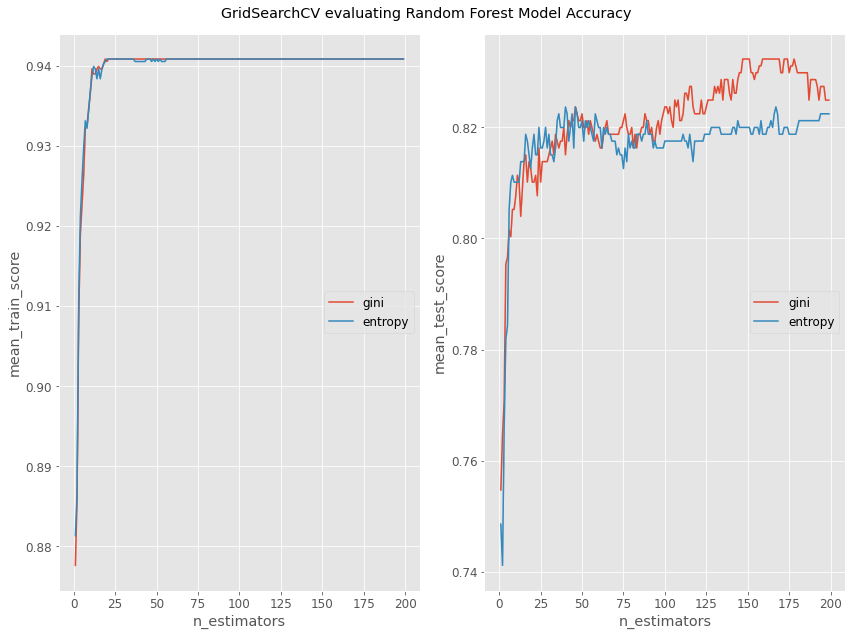

In [64]:
# create figure and axis
fig, ((ax1, ax2)) = plt.subplots(1, 2)
fig.suptitle('GridSearchCV evaluating Random Forest Model Accuracy')

# plot model scores
sns.lineplot(
    x='n_estimators', y='mean_train_score', 
    hue='criterion',
    data=rfc_df, ax=ax1)

sns.lineplot(
    x='n_estimators', y='mean_test_score', 
    hue='criterion', 
    data=rfc_df, ax=ax2)


# labels plot axes
for ax in ax1, ax2:
    ax.legend(loc=5)


# Feature Importance

In [65]:
# select best features
feature_importance = rfc_gscv.best_estimator_.named_steps['rfc'].feature_importances_
feature_names = rfc_gscv.feature_names_in_

# create and sort feature importance based on feature importance
feat_imp = pd.DataFrame(data=feature_importance, index=feature_names)
feature_importance = feat_imp[0]

# print final output
final_output = feature_importance.sort_values(ascending=False)
final_output

BS                0.335647
SystolicBP        0.159081
Age               0.129814
DiastolicBP       0.106999
HeartRate         0.093513
BodyTemp          0.047197
AgeCat            0.035154
SystolicBPCat     0.026832
BodyTempCat       0.026607
DiastolicBPCat    0.016211
BSCat             0.013631
HeartRateCat      0.009315
Name: 0, dtype: float64

Plot Feature Importance Output

[Text(0.5, 0, 'Feature Importance (%)'),
 Text(0, 0.5, 'Feature Names'),
 Text(0.5, 1.0, 'Barplot of feature importance')]

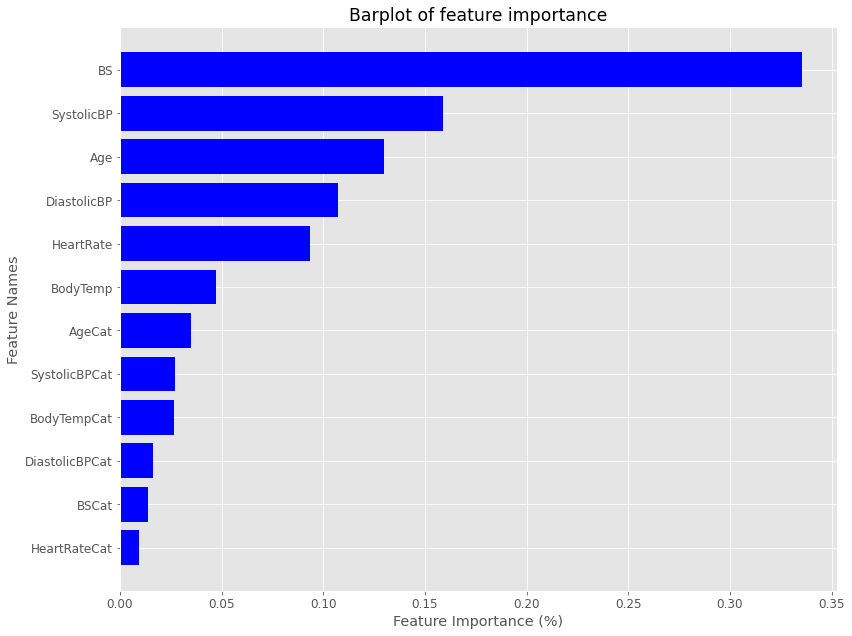

In [66]:
# create figure and axis
fig, ax = plt.subplots()

# plot horizontal bar graph
ax.barh(final_output.keys(), final_output.values, align='center', color='blue')

# labels read top-to-bottom
ax.invert_yaxis()

# label bar plot
ax.set(xlabel='Feature Importance (%)', ylabel='Feature Names', title='Barplot of feature importance')

# Final Model Prediction

In [67]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor), ('rfc', RandomForestClassifier(n_estimators=20, criterion='gini', max_features='auto', random_state=rnd_state))
])

final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('qt',
                                                                   QuantileTransformer(random_state=42))]),
                                                  Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'], dtype='object')),
                                                 ('non_numeric',
                                                  Pipeline(steps=[('ordenc',
                                                                   OrdinalEncoder())]),
                                                  Index(['AgeCat', 'SystolicBPCat', 'DiastolicBPCat', 'BSCat', 'BodyTempCat',
       'HeartRateCat'],
      dtype='object'))])),
                ('rfc',
                 RandomForestClassifier(max_features='auto', n_estimators=20,
                                        random_state=42))])

In [68]:
display_test_score(final_model)

'Model test score: 82.76%'

# Save Final Model

In [69]:
import joblib

# final model
model = final_model.fit(X_test, y_test)

joblib.dump(final_model, 'maternal_risk_prediction_model.pkl')

['maternal_risk_prediction_model.pkl']